---
## PCA
Daten werden auf orthogonalen Achsen mit maximaler Varianz (=wichtigste Infos der Daten bleiben erhalten) in einen neuen Merkmalsunterraum projiziert. 

---
### IMPORTS

In [23]:
import numpy as np
import pandas as pd
from sklearn import datasets

---
### LOAD DATA

In [24]:
X, y = datasets.load_wine(return_X_y=True)
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

---
## TRAIN TEST SPLIT

In [26]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0, stratify=y)

---
## Merkmale MÜSSEN für PCA Standardisiert werden!!

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Train_std = sc.fit_transform(X_Train)
X_Test_std  = sc.fit(X_Test)

### np.cov = Kovarianzmatrix berechnen
### np.linalg.eign = Zerlegung der Kovarianzmatrix in Eigenwerte und Eigenvektoren

In [28]:
cov_matrix = np.cov(X_Train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)
print("\nEigenwerte: \n%s" % eigen_vals)


Eigenwerte: 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [29]:
tot = sum(eigen_vals)
sorted_vals = sorted(eigen_vals, reverse=True)
var_exp = [(i / tot) for i in sorted_vals]  # Eigenwerte sortieren, absteigend und so  die Werte durch die Summe dividieren = Anteil 
cum_var_exp = np.cumsum(var_exp)

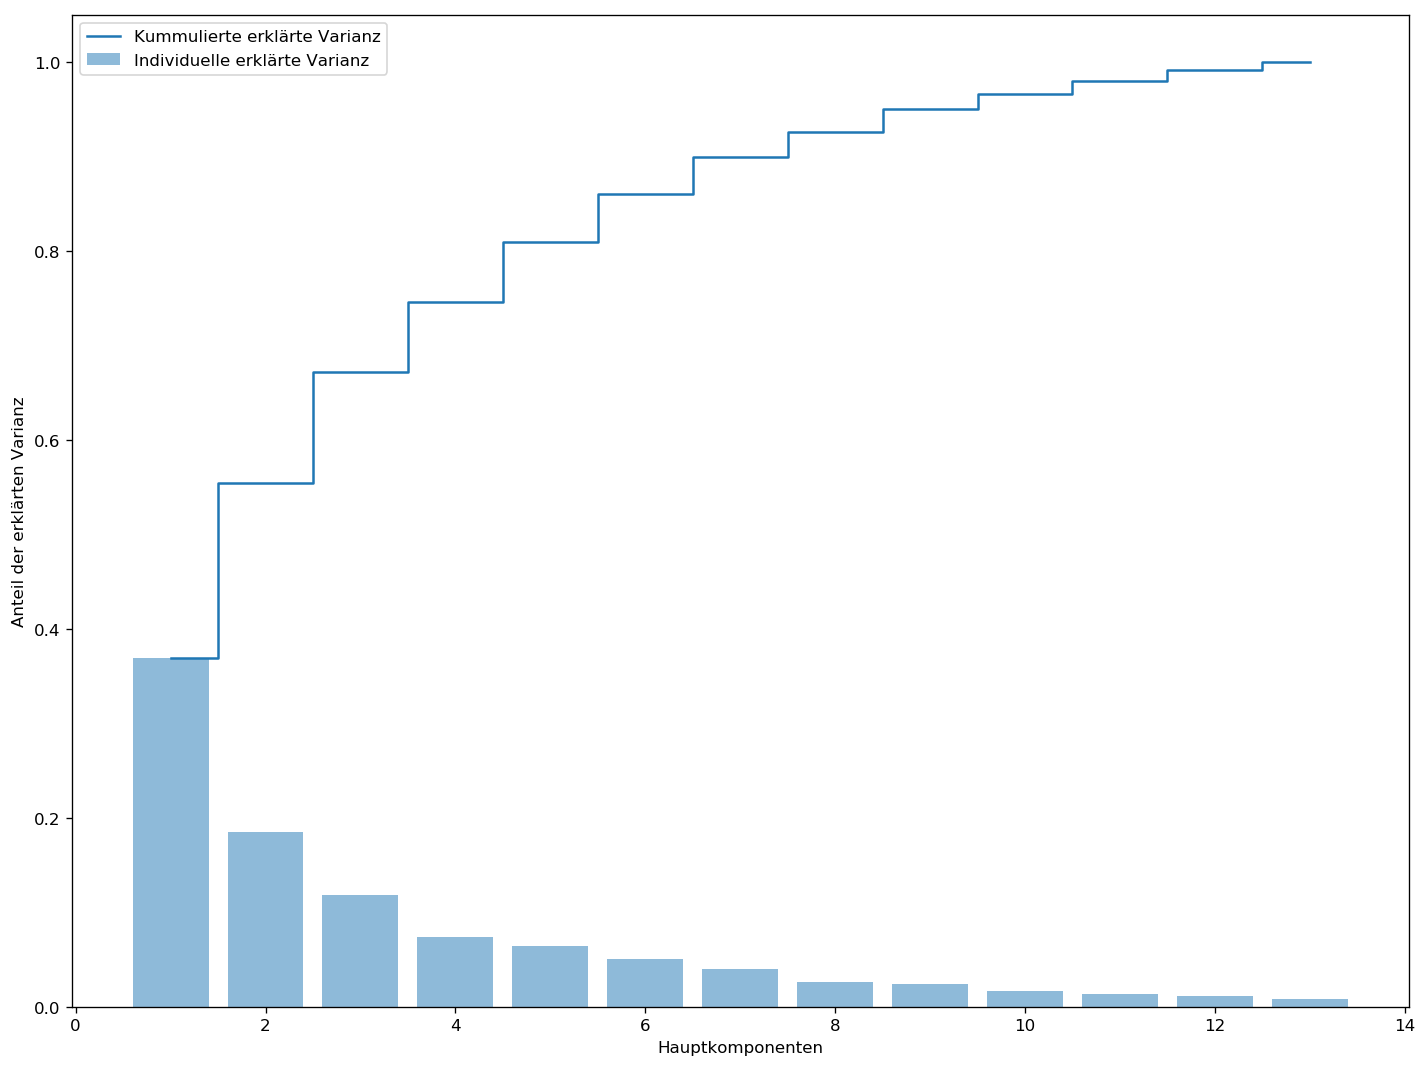

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9), dpi=120)
plt.bar(range(1,14), var_exp, alpha=.5, align="center", label="Individuelle erklärte Varianz")
plt.step(range(1,14), cum_var_exp, where="mid", label="Kummulierte erklärte Varianz")
plt.ylabel("Anteil der erklärten Varianz")
plt.xlabel("Hauptkomponenten")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Sortieren der Paare aus Eigenvektoren und Eigenwerten nach der Größe der Eigenwerte

In [36]:
# Liste von (Eigenwerten, Eigenvektoren)-Tupel anlegen
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
# nun die Tupel in absteigender Reihenfolge sortieren
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs

[(4.8427453156558915,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (2.4160245870352273,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])),
 (1.5484582488203547,
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022])),
 (0.9612043774977379,
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])),
 (0.8416616104578419,
  array([ 0.29062523, -0.08953787,  0.16083499, -0.05158734, -0.67648707,
          0.11851114